<a href="https://colab.research.google.com/github/vedantirb/cross3d/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print ("test")

test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       400 non-null    int64  
 1   gre         400 non-null    int64  
 2   toefl       400 non-null    int64  
 3   uni_rating  400 non-null    int64  
 4   sop         400 non-null    float64
 5   lor         400 non-null    float64
 6   cgpa        400 non-null    float64
 7   research    400 non-null    int64  
 8   admit       400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
            count        mean         std  ...      50%     75%     max
index       340.0  200.150000  114.640690  ...  199.500  297.25  400.00
gre         340.0  316.561765   11.390585  ...  316.500  325.00  340.00
toefl       340.0  107.247059    6.120050  ...  107.000  111.25  120.00
uni_rating  340.0    3.070588    1.134477  ...    3.000    4.00    5.00
sop         340.0    3.388235    1

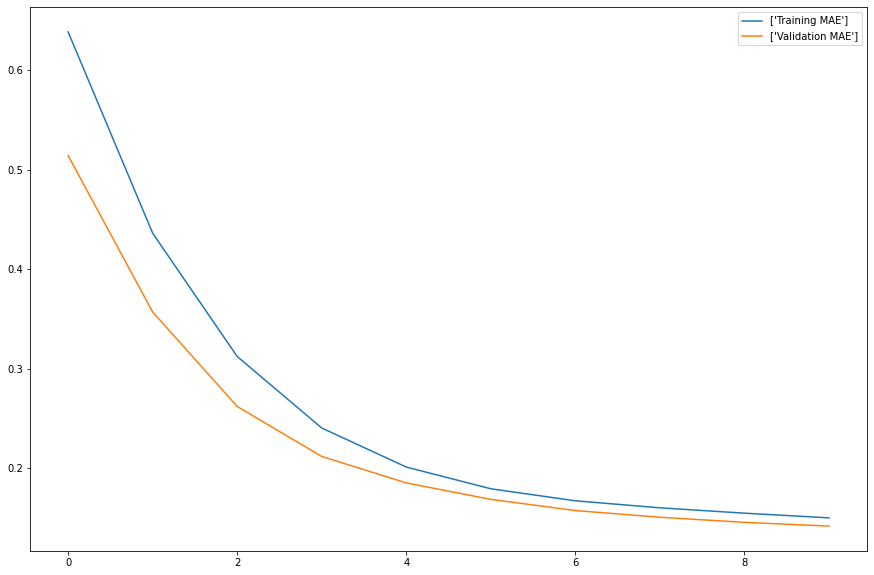

In [ ]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib as plt

url = 'https://raw.githubusercontent.com/Afsaan/Linear-Regression-with-TensorFlow-2.x/master/graduate_admission.csv'
df = pd.read_csv(url)

#printing top 5 rows
df.head()
df.info()
#target 
target = 'admit'

# Categorical Columns
categorical_columns = ['research']
df = pd.get_dummies(df,columns = categorical_columns)

training_df = df.sample(frac=0.85, random_state=101)
validation_df = df.drop(training_df.index)
# Removing labels from data and converting to numpy array
training_labels = training_df.pop(target).values
validation_labels = validation_df.pop(target).values
# basic stats of the training dataset
stats = training_df.describe().transpose()
print(stats)
# scaling data w.r.t training_df
normalization_training_df = (training_df-stats['mean'])/stats['std']
normalization_validation_df = (validation_df-stats['mean'])/stats['std']
# converting the data to numpy array
training_data = normalization_training_df.to_numpy()
validation_data = normalization_validation_df.to_numpy()
# prepare tf.data.Dataset for training
def prepare_dataset(data , labels , batch, shuffle):
  dataset = tf.data.Dataset.from_tensor_slices((data , labels))
  dataset = dataset.shuffle(shuffle)
  dataset = dataset.batch(batch).prefetch(1)
  return dataset
# preparing Dataset for training
batch_size = 32
buffer = 100
training_dataset = prepare_dataset(training_data, training_labels, batch_size, buffer)
validation_dataset = prepare_dataset(validation_data, validation_labels, batch_size, buffer)
# creating the model

model = tf.keras.Sequential([
      tf.keras.layers.Dense(1 , activation='sigmoid',),
        tf.keras.layers.Dense(4 , activation='relu'),
        tf.keras.layers.Dense(7 , activation='relu'),

        tf.keras.layers.Dense(1)
        ])
# compiling the model
model.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)
history = model.fit(
    training_dataset,
    epochs=10,
    validation_data = validation_dataset
)
model.summary()

# plotting Training and Validation Loss and MAE
mae = history.history['mae']
validation_mae = history.history['val_mae']
epochs = range(len(mae))
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(epochs, mae , label=['Training MAE'])
plt.plot(epochs, validation_mae , label=['Validation MAE'])
plt.legend()
plt.savefig('mae.jpg')
plt.show()
